In [93]:
#load library and create subsets
#library(dplyr)

samples <- read.table('both_samples_condition.tsv')

#bsamples <- samples %>% filter(tissue == "brain")
#gsamples <- samples %>% filter(tissue == "gut")
gundiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "undiff")
#gdiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "diff")

In [94]:
gundiffsamples

,condition,replicate,organoid_stage,id,name,tissue
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
S10,VA1,3,undiff,S10,VA1_gut_undiff_S10,gut
S11,HAstV4,2,undiff,S11,HAstV4_gut_undiff_S11,gut
S12,HAstV4,3,undiff,S12,HAstV4_gut_undiff_S12,gut
S4,MLB2,1,undiff,S4,MLB2_gut_undiff_S4,gut
S5,MLB2,2,undiff,S5,MLB2_gut_undiff_S5,gut
S6,MLB2,3,undiff,S6,MLB2_gut_undiff_S6,gut
S1,Mock,1,undiff,S1,Mock_gut_undiff_S1,gut
S2,Mock,2,undiff,S2,Mock_gut_undiff_S2,gut
S3,Mock,3,undiff,S3,Mock_gut_undiff_S3,gut


In [95]:
gpccounts = as.matrix(read.csv('../../output/gut/counts_protein_coding.csv',row.names = 1))
dim(gpccounts)

[1] 20070    24

In [96]:
#load genes (using gut_genes, since brain's one was confused)
ggenes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)
ggenes[1:4,]

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000279928,1,182696,184174,+,ENSG00000279928,DDX11L17,unprocessed_pseudogene
ENSG00000228037,1,2581560,2584533,+,ENSG00000228037,NA,lncRNA
ENSG00000142611,1,3069168,3438621,+,ENSG00000142611,PRDM16,protein_coding
ENSG00000284616,1,5301928,5307394,-,ENSG00000284616,NA,lncRNA


In [44]:
library(DESeq2)
colours = c(
    HAstV4_diff='#b80101',
    HAstV4='#ff9301',
    HAstV4_undiff='#ffc101',
    MLB2_diff='#7b0fa6',
    MLB2='#592bf5',
    MLB2_undiff='#679ffa',
    VA1_diff='#1a5d3a',
    VA1='#1fbd6b',
    VA1_undiff='#82de25',
    Mock_diff='#4b4b49',
    Mock='#919190',
    Mock_undiff='#c5c5c0',
    diff='#aa05b2',
    undiff='#f68ed7')


In [97]:
#colnames(bpccounts) == rownames(bsamples)
gpccounts = gpccounts[,rownames(gundiffsamples)]
gpccounts

,S10,S11,S12,S4,S5,S6,S1,S2,S3,S7,S8,S9
ENSG00000142611,247,314,242,382,382,361,450,315,469,374,252,304
ENSG00000157911,94,141,148,170,132,138,175,126,166,179,71,96
ENSG00000142655,73,189,146,74,83,175,116,126,50,104,112,104
ENSG00000149527,0,33,0,3,10,0,14,18,15,27,0,0
ENSG00000171621,91,51,162,168,50,119,173,54,56,97,128,175
ENSG00000142583,26,7,13,14,22,5,17,21,29,12,15,46
ENSG00000173614,74,132,85,136,61,191,113,105,134,50,95,119
ENSG00000162592,0,9,0,6,0,0,0,0,9,0,0,0
ENSG00000204624,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000142606,38,21,15,74,19,58,19,0,61,24,31,20


In [98]:
colnames(gpccounts)
rownames(gundiffsamples)

[1] "S10" "S11" "S12" "S4"  "S5"  "S6"  "S1"  "S2"  "S3"  "S7"  "S8"  "S9"

[1] "S10" "S11" "S12" "S4"  "S5"  "S6"  "S1"  "S2"  "S3"  "S7"  "S8"  "S9"

In [99]:
rownames(gundiffsamples) = colnames(gpccounts) = gundiffsamples$name
deseq = DESeqDataSetFromMatrix(countData = gpccounts,
                              colData = gundiffsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 12 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(12): VA1_gut_undiff_S10 HAstV4_gut_undiff_S11 ...
  VA1_gut_undiff_S8 HAstV4_gut_undiff_S9
colData names(6): condition replicate ... name tissue

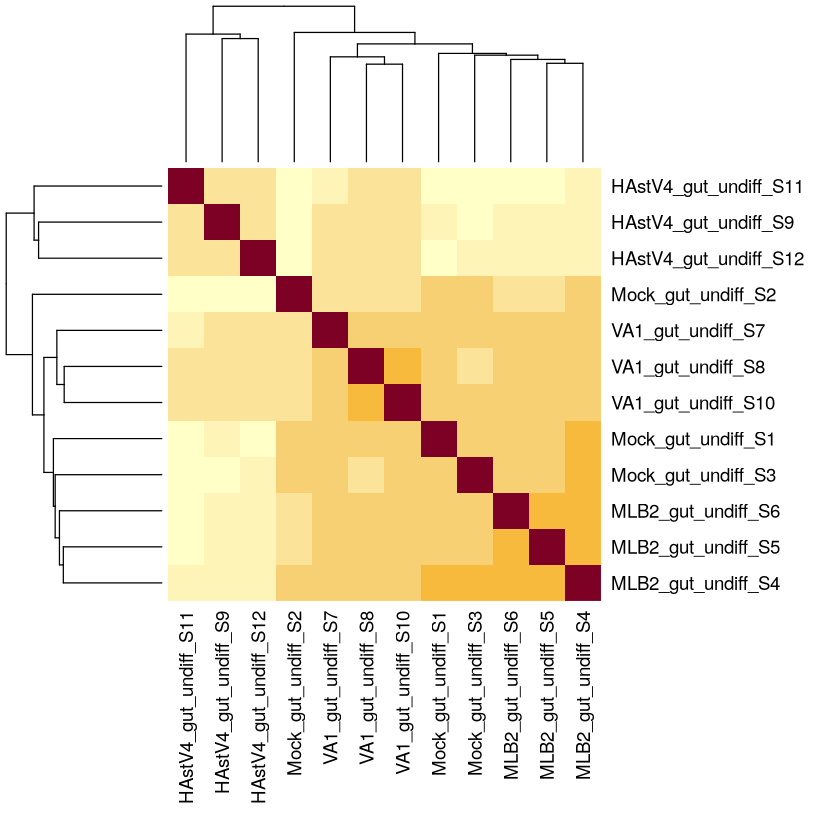

In [29]:
# heatmap for nofiltered deseq data
#pdf('../../figures/gut/05_gundiff_human_heatmap_nofiltered genes.pdf',w=8,h=8.5)
cor = cor(counts(deseq),method = 'sp')
##cor = cor(vsd@assays@data[[1]],method = 'p')
heatmap(cor,distfun = function(x)as.dist(1-x),symm = TRUE,margins = c(12,12))
#dev.off()


FALSE  TRUE 
 6160 13910 

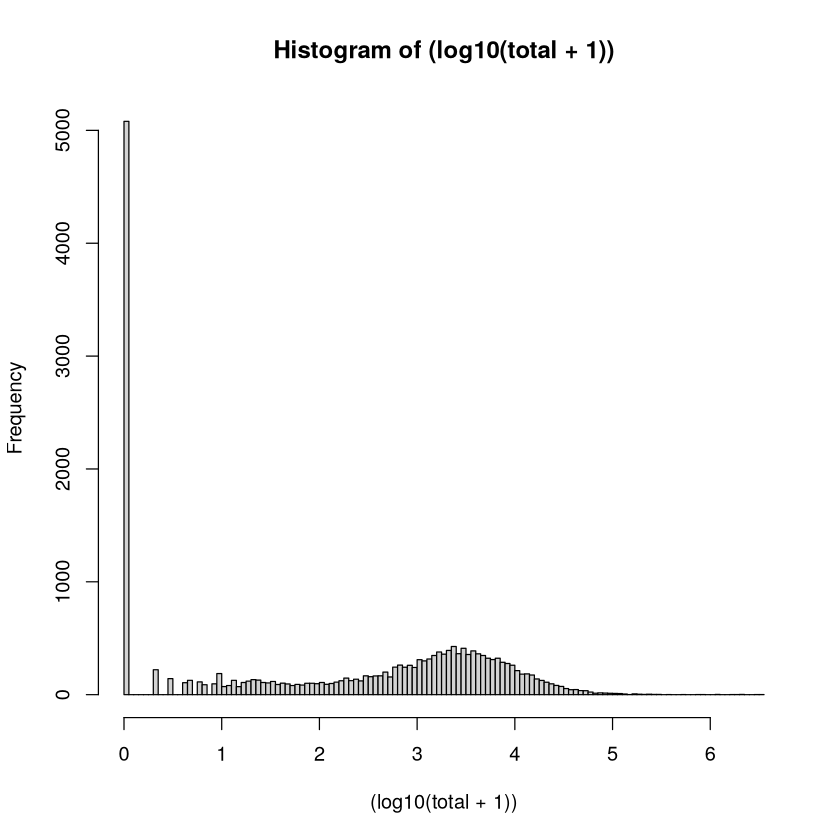

In [100]:
# filter genes by total read counts (true if >10 reads)
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)
#for undiff_contrast_nofilter true>10, output is FALSE  6160 TRUE 13910 

In [101]:
# filter genes (Counting the number of samples where each gene has ≥10 reads (e.g., 419 genes have ≥10 reads in two samples))
ngundiffsamples10 = rowSums(counts(deseq)>=10)
table(ngundiffsamples10)

ngundiffsamples10
   0    1    2    3    4    5    6    7    8    9   10   11   12 
6463  873  419  269  214  197  197  193  238  226  314  510 9957 

In [102]:
dim(deseq)

[1] 20070    12

In [103]:
#pre-filtering, to keep genes that have at least 10 reads in 3 or more samples
smallestGroupSize <- 3
keep <- rowSums(counts(deseq) >= 10) >= smallestGroupSize
deseq <- deseq[keep,]

In [104]:
dim(deseq)

[1] 12315    12

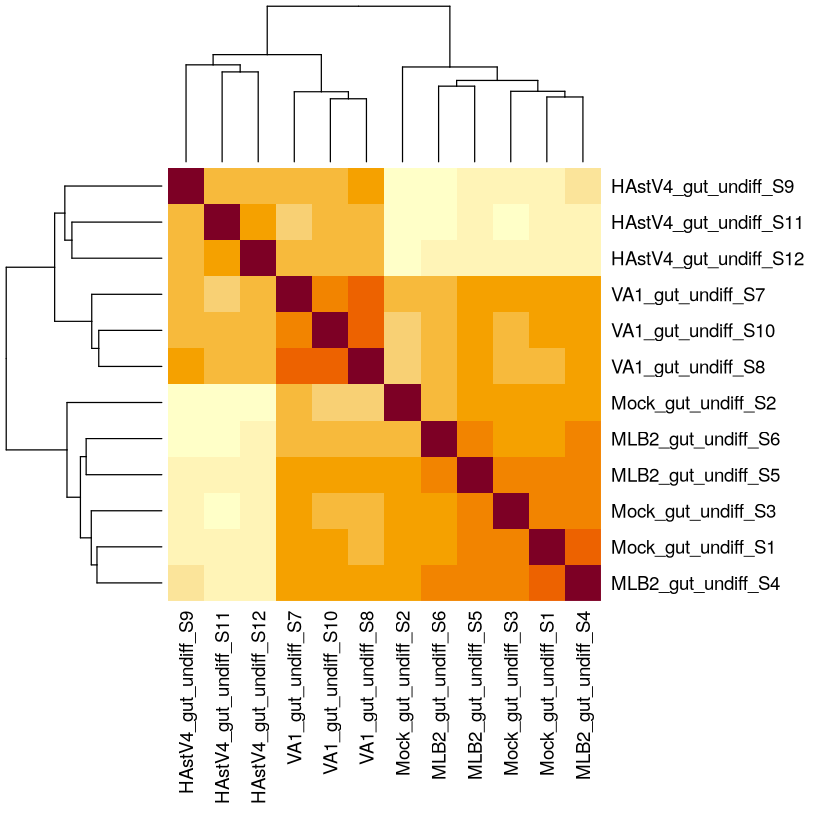

In [35]:
# heatmap for filtered deseq data (genes that have at least 10 reads in 3 or more samples)
#pdf('../../figures/gut/05_gundiff_human_heatmap_filtered genes.pdf',w=8,h=8.5)
cor = cor(counts(deseq),method = 'sp')
##cor = cor(vsd@assays@data[[1]],method = 'p')
heatmap(cor,distfun = function(x)as.dist(1-x),symm = TRUE,margins = c(12,12))
#dev.off()

all viruses together

In [105]:
deseq = DESeq(deseq)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [54]:
#deseq with where contrast using virus/Mock
#cnds = c('MLB2','VA1','HAstV4')
#res = lapply(cnds,function(c)results(deseq,contrast = c('condition','Mock',c), independentFiltering=FALSE))
#names(res) = cnds

In [108]:
#deseq with where contrast using Mock/virus
cnds = c('MLB2','VA1','HAstV4')
res = lapply(cnds,function(c)results(deseq,contrast = c('condition',c, 'Mock'), independentFiltering=FALSE))
names(res) = cnds

In [109]:
res

$MLB2
log2 fold change (MLE): condition MLB2 vs Mock 
Wald test p-value: condition MLB2 vs Mock 
DataFrame with 12315 rows and 6 columns
                  baseMean log2FoldChange     lfcSE       stat    pvalue
                 <numeric>      <numeric> <numeric>  <numeric> <numeric>
ENSG00000142611  332.03747     -0.0190699  0.207619 -0.0918509  0.926817
ENSG00000157911  131.82447      0.0162540  0.325888  0.0498760  0.960221
ENSG00000142655  111.76362      0.2608003  0.453924  0.5745459  0.565598
ENSG00000149527    9.56838     -1.7543252  2.701744 -0.6493307  0.516125
ENSG00000171621  108.73329      0.3656743  0.520700  0.7022743  0.482508
...                    ...            ...       ...        ...       ...
ENSG00000198727 91185.5659      0.0693728 0.0762288  0.9100593  0.362791
ENSG00000276256    25.0797     -0.3108140 0.8821449 -0.3523389  0.724584
ENSG00000273748    45.5163     -0.4347423 0.6779253 -0.6412835  0.521339
ENSG00000278817    13.9926     -0.4284192 2.4735840 -0.17319

In [110]:
saveRDS(res,'../../rds/deseq2_gut_undiff_mockvirus.rds')
#x = readRDS('gundiff_re.rds')

In [63]:
#library(EnhancedVolcano)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'i' in selecting a method for function '[[': argument "x" is missing, with no default


In [85]:
#writes plots on different pages
#pdf('../../figures/gut/06_gundiff_volcano.pdf',w=8,h=8.5)
#plots = list()
#for(vir_name in names(res)){
#    r = res[[vir_name]]
#    plots[[vir_name]] = EnhancedVolcano(r,
#        lab = ggenes[rownames(r),'gene_name'],
#        x = 'log2FoldChange',
#        y = 'pvalue',
#        xlab = paste0('log2(',vir_name,'/Mock)'),
#        caption=vir_name)
#}
#plots
#dev.off()

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”
Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


$MLB2

$VA1

$HAstV4


pdf 
  2

In [87]:
#install.packages("cowplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”
Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


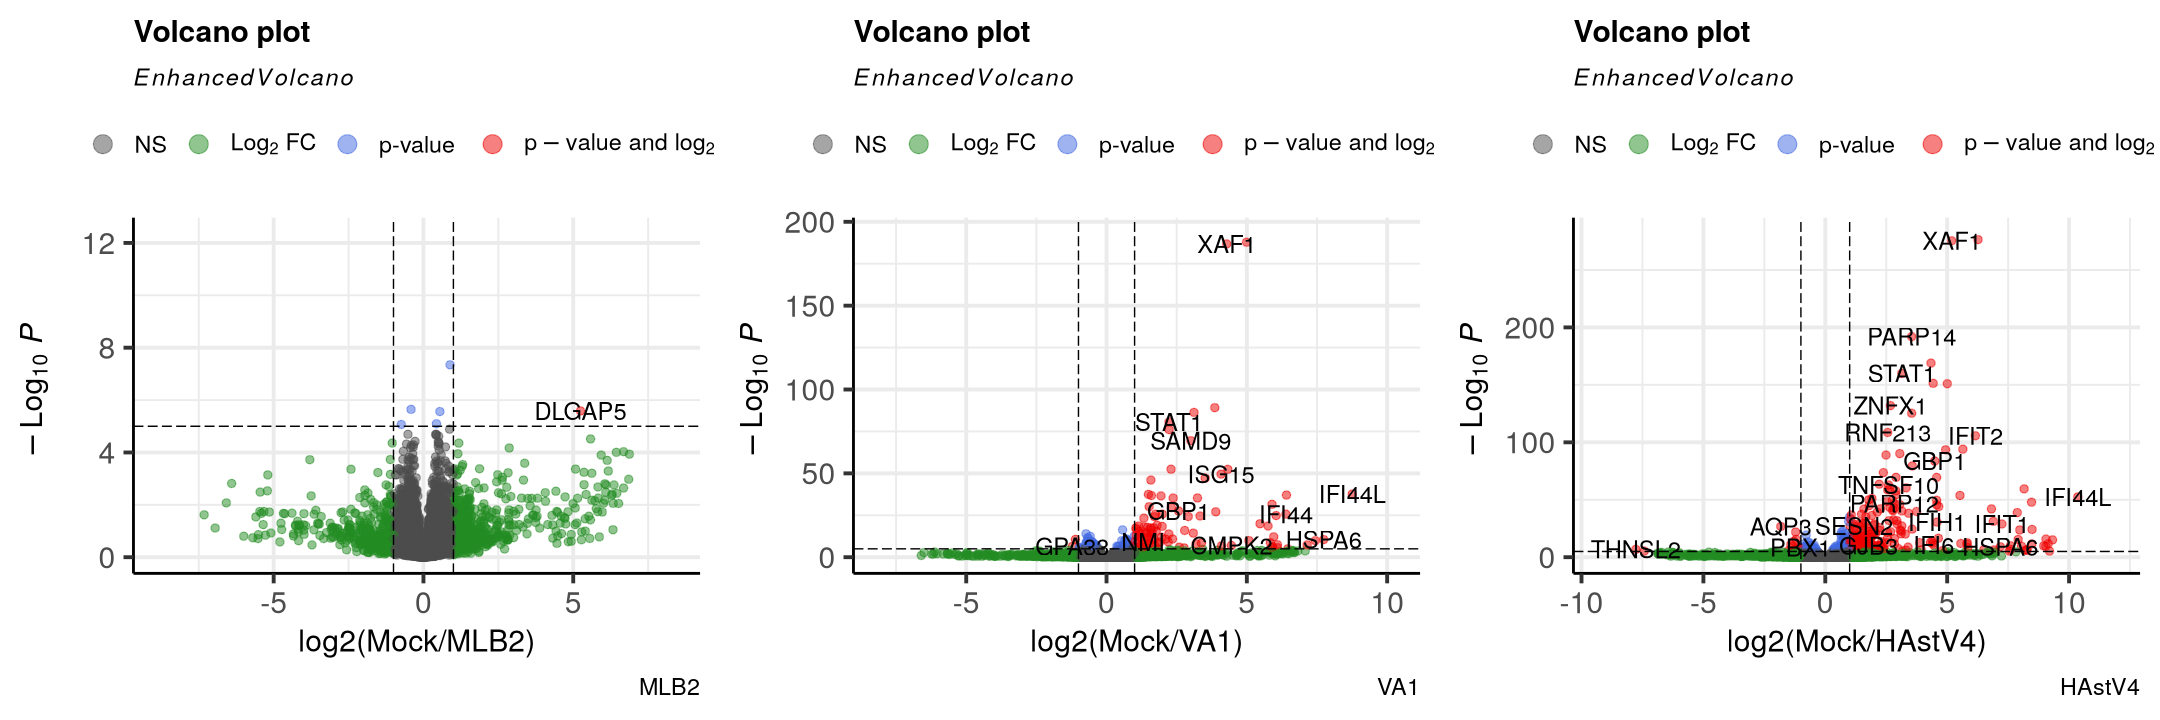

In [113]:
#writes plots on one page
library(cowplot)  # For arranging plots

# Increase figure size before plotting (useful in Jupyter/RStudio)
options(repr.plot.width = 18, repr.plot.height = 6)  

library(EnhancedVolcano)
library(cowplot)

plots = list()
for (vir_name in names(res)) {
    r = res[[vir_name]]
    plots[[vir_name]] = EnhancedVolcano(r,
        lab = ggenes[rownames(r), 'gene_name'],
        x = 'log2FoldChange',
        y = 'pvalue',
        xlab = paste0('log2(Mock/', vir_name, ')'),
        caption = vir_name)
}

# Arrange plots in one row with better spacing
plot_grid(plotlist = plots, nrow = 1, ncol = 3, align = "hv", rel_widths = c(1.5, 1.5, 1.5))


Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”
Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


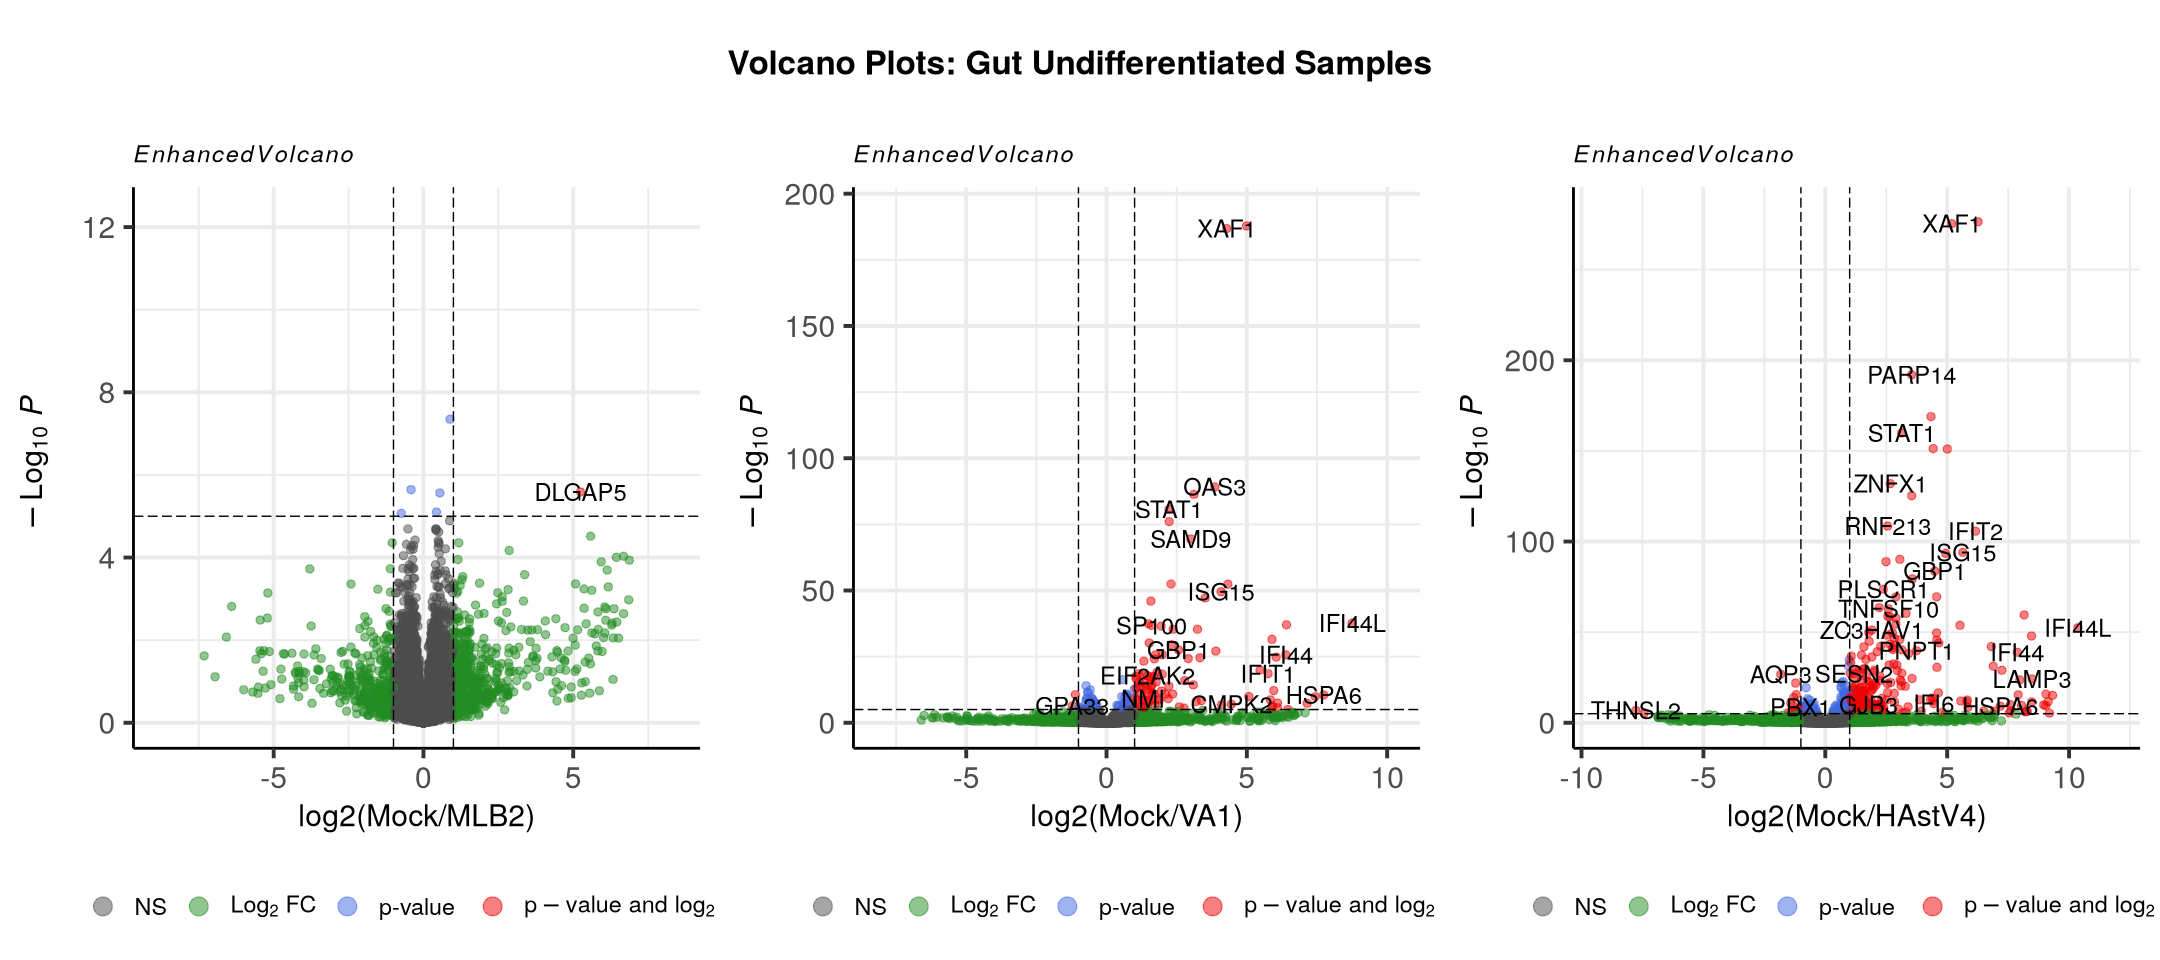

In [121]:
options(repr.plot.width = 18, repr.plot.height = 8)  # Increase height for legends

plots = list()
for (vir_name in names(res)) {
    r = res[[vir_name]]
    plots[[vir_name]] = EnhancedVolcano(r,
        lab = ggenes[rownames(r), 'gene_name'],
        x = 'log2FoldChange',
        y = 'pvalue',
        xlab = paste0('log2(Mock/', vir_name, ')'),
        title = NULL,  # Remove individual titles
        caption = NULL
    ) + theme(legend.position = "bottom")  # Move legend below each plot
}

# Create a common title with more space
title <- ggdraw() + draw_label("Volcano Plots: Gut Undifferentiated Samples", 
                               fontface = 'bold', size = 20, hjust = 0.5)

# Arrange all plots in one row with enough space for the title & legends
final_plot <- plot_grid(title, 
                        plot_grid(plotlist = plots, nrow = 1, ncol = 3, 
                                  align = "hv", rel_widths = c(1.5, 1.5, 1.5)), 
                        ncol = 1, rel_heights = c(0.15, 1))  # More space for title

# Display the final plot
print(final_plot)

In [126]:
#save_plot("06_volcano_gut_undif.png", plot_grid(plotlist = plots, nrow = 1, ncol = 3, align = "hv", rel_widths = c(1.5, 1.5, 1.5)), 
#         base_width = 18, base_height = 6, dpi = 300)

# Сохраняем с увеличенной высотой
ggsave("06_volcano_gut_undiff.png", final_plot, width = 24, height = 10, dpi = 300)

In [80]:
#?EnhancedVolcano

EnhancedVolcano {EnhancedVolcano},R Documentation
toptable,"A data-frame of test statistics (if not, a data frame, an attempt will be made to convert it to one). Requires at least the following: column for variable names (can be rownames); a column for log2 fold changes; a column for nominal or adjusted p-value."
lab,A column name in toptable containing variable names. Can be rownames(toptable).
x,A column name in toptable containing log2 fold changes.
y,A column name in toptable containing nominal or adjusted p-values.
selectLab,A vector containing a subset of lab.
xlim,Limits of the x-axis.
ylim,Limits of the y-axis.
xlab,Label for x-axis.
ylab,Label for y-axis.
axisLabSize,Size of x- and y-axis labels.


In [30]:
#This returns a named vector with the count of significantly differentially expressed genes for each condition
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
         10         185         534

In [29]:
lapply(res, function(x) {
    f = x$padj < 0.05 & abs(x$log2FoldChange) > 1  # Add log2FoldChange condition
    f[is.na(f)] = FALSE  # Handle NA values
    x = as.data.frame(x[f, c(1,2,6)])  # Select relevant columns
    x$gene_name = ggenes[rownames(x), 'gene_name']  # Add gene names
    x[order(x$log2FoldChange), ]  # Order by log2FoldChange
})



,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000197191,7.95375,-6.874585,0.042171851,CYSRT1
ENSG00000128536,10.26973,-6.680516,0.038239917,CDHR3
ENSG00000160781,10.82179,-6.440680,0.039405474,PAQR6
ENSG00000100490,12.03499,-5.935252,0.043262775,CDKL1
ENSG00000176749,24.70645,-5.579616,0.028888247,CDK5R1
ENSG00000126787,24.19080,-5.241779,0.008430554,DLGAP5
ENSG00000137959,637.53618,-2.864127,0.030797096,IFI44L
ENSG00000165376,435.11696,-1.179096,0.029516185,CLDN2
ENSG00000163735,200.22197,-1.149269,0.041833488,CXCL5


In [32]:
lapply(names(res), function(cond) {
    x <- res[[cond]]  # Extract results for each virus
    
    # Apply filtering: padj < 0.1 and abs(log2FoldChange) > 1
    f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1
    f[is.na(f)] <- FALSE  # Handle NA values

    # Convert to dataframe and add gene names
    df <- as.data.frame(x[f, c(1, 2, 6)])  
    df$gene_name <- ggenes[rownames(df), 'gene_name']

    # Sort by log2FoldChange
    df <- df[order(df$log2FoldChange), ]

    # Save to CSV file
    filename <- paste0(cond, "_gundiff_Significant_Genes.csv")  
    write.csv(df, file = filename, row.names = FALSE)

    # Print first few rows for review
    cat("\nFirst few rows for", cond, ":\n")
    print(head(df))

    return(df)  # Optional: return dataframe
})




First few rows for MLB2 :
                baseMean log2FoldChange        padj gene_name
ENSG00000197191  7.95375      -6.874585 0.042171851    CYSRT1
ENSG00000128536 10.26973      -6.680516 0.038239917     CDHR3
ENSG00000160781 10.82179      -6.440680 0.039405474     PAQR6
ENSG00000100490 12.03499      -5.935252 0.043262775     CDKL1
ENSG00000176749 24.70645      -5.579616 0.028888247    CDK5R1
ENSG00000126787 24.19080      -5.241779 0.008430554    DLGAP5

First few rows for VA1 :
                  baseMean log2FoldChange         padj gene_name
ENSG00000137959 637.536181      -8.755425 2.026350e-35    IFI44L
ENSG00000173110  51.802313      -7.738465 4.998732e-09     HSPA6
ENSG00000130303 246.037290      -7.440105 2.103801e-08      BST2
ENSG00000120217  55.886621      -7.152087 4.908814e-06     CD274
ENSG00000205269   9.201849      -7.080857 7.562895e-03  TMEM170B
ENSG00000212901   9.723468      -6.822255 8.360754e-03  KRTAP3-1

First few rows for HAstV4 :
                 baseMean log

,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000197191,7.95375,-6.874585,0.042171851,CYSRT1
ENSG00000128536,10.26973,-6.680516,0.038239917,CDHR3
ENSG00000160781,10.82179,-6.440680,0.039405474,PAQR6
ENSG00000100490,12.03499,-5.935252,0.043262775,CDKL1
ENSG00000176749,24.70645,-5.579616,0.028888247,CDK5R1
ENSG00000126787,24.19080,-5.241779,0.008430554,DLGAP5
ENSG00000137959,637.53618,-2.864127,0.030797096,IFI44L
ENSG00000165376,435.11696,-1.179096,0.029516185,CLDN2
ENSG00000163735,200.22197,-1.149269,0.041833488,CXCL5


In [ ]:
sapply(res,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

In [20]:
summary(res$MLB2)



out of 12315 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 40, 0.32%
LFC < 0 (down)     : 59, 0.48%
outliers [1]       : 1, 0.0081%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [21]:
lapply(res,function(x){
    f = x$padj<0.1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000197191,7.953750,-6.8745849,0.0421718505,CYSRT1
ENSG00000128536,10.269732,-6.6805162,0.0382399174,CDHR3
ENSG00000160781,10.821793,-6.4406803,0.0394054742,PAQR6
ENSG00000083807,11.028471,-6.1716417,0.0800530854,SLC27A5
ENSG00000174951,12.346851,-6.1340610,0.0537499941,FUT1
ENSG00000100490,12.034991,-5.9352519,0.0432627748,CDKL1
ENSG00000167914,8.171199,-5.6194487,0.0873580987,GSDMA
ENSG00000176749,24.706448,-5.5796164,0.0288882467,CDK5R1
ENSG00000136982,12.499450,-5.3605871,0.0831772296,DSCC1


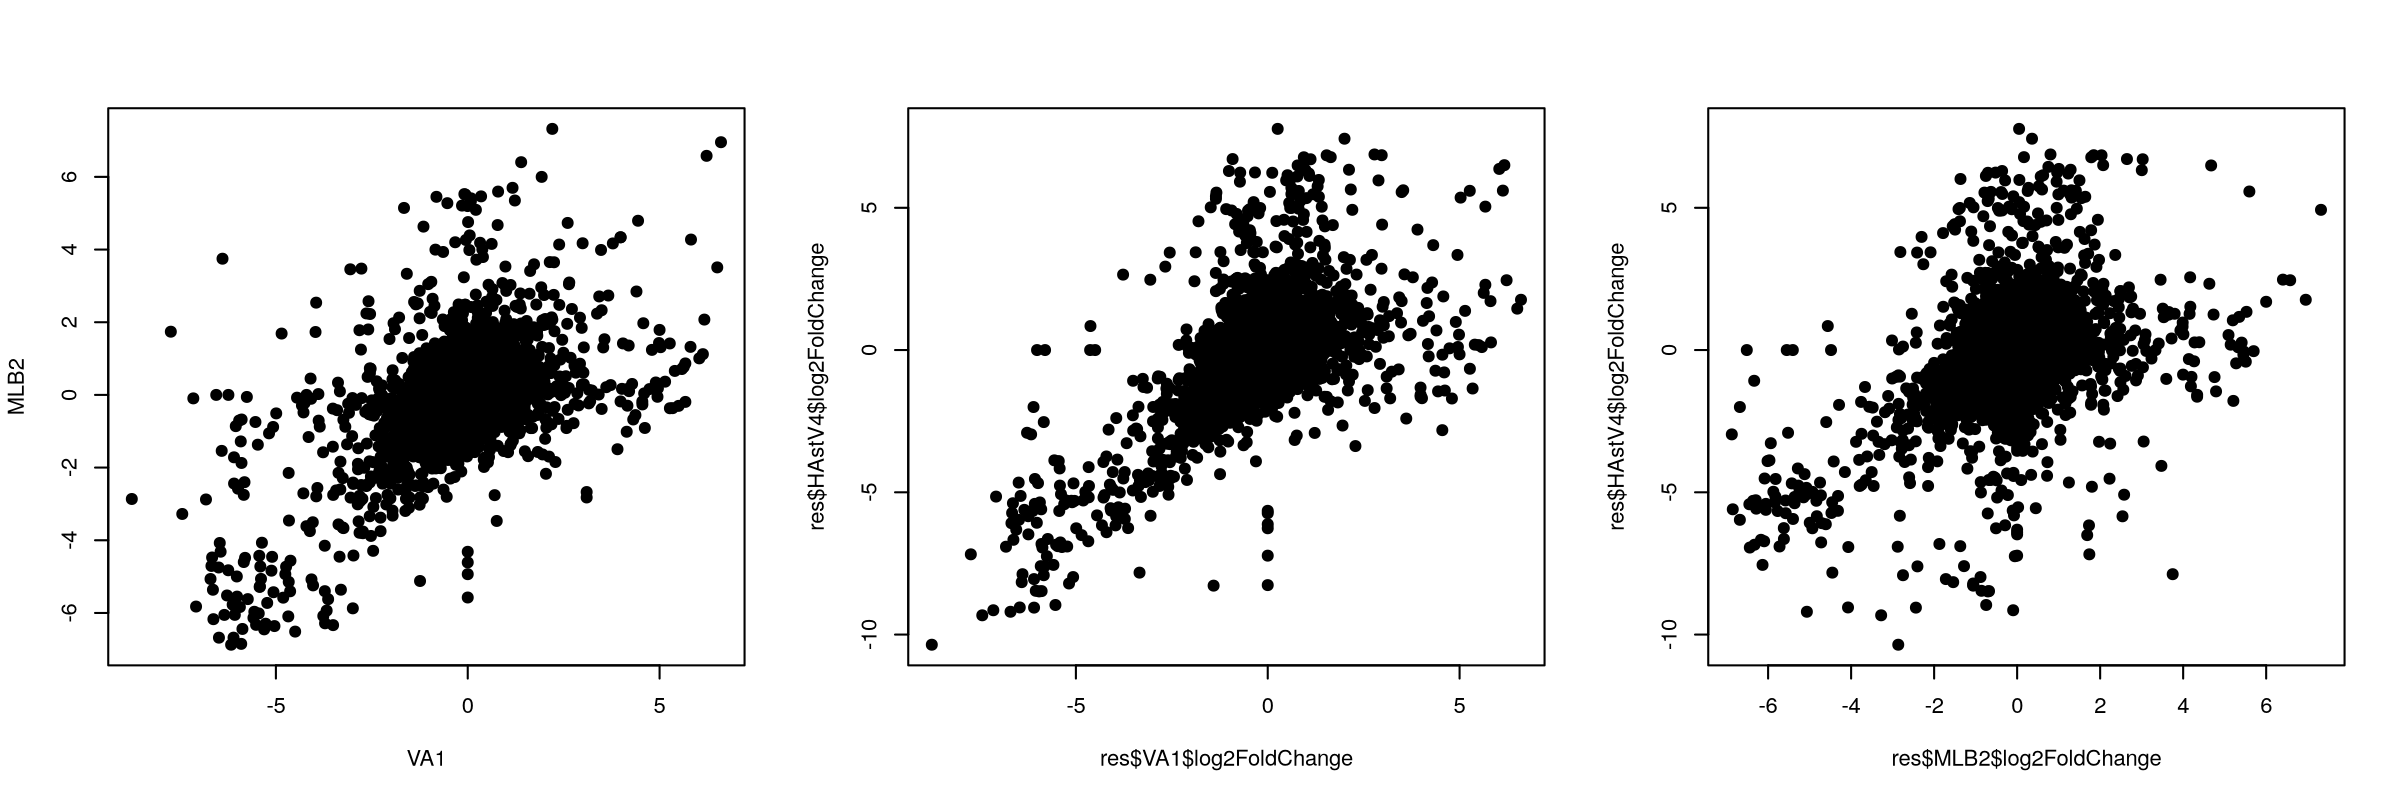

In [22]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
par(mfrow=c(1,3))
plot(res$VA1$log2FoldChange,res$MLB2$log2FoldChange,pch=19,xlab='VA1',ylab='MLB2')
plot(res$VA1$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)
plot(res$MLB2$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)

In [23]:
summary(res)

       Length Class        Mode
MLB2   6      DESeqResults S4  
VA1    6      DESeqResults S4  
HAstV4 6      DESeqResults S4  

In [25]:
#total number of significant genes across all condition
sum(sapply(res, function(x) sum(x$padj < 0.1, na.rm=TRUE)))

[1] 2490

In [46]:
f = res$MLB2$log2FoldChange>5 & res$VA1$log2FoldChange>5
sel = res$VA1[f,]
cbind(sel,ggenes[rownames(sel),'gene_name'])

DataFrame with 2 rows and 7 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000146267   4.87637        6.22526   2.49743   2.49267 0.0126787
ENSG00000196787   6.92157        6.60054   3.92917   1.67988 0.0929809
                     padj ggenes[rownames(sel), "gene_name"]
                <numeric>                        <character>
ENSG00000146267  0.171243                               FAXC
ENSG00000196787  0.497379                             H2AC11

one by one virus

In [33]:
cnds = c('MLB2','VA1','HAstV4')
res2 = lapply(cnds,function(c){
    f = gundiffsamples$condition %in% c('Mock',c)
    x = DESeqDataSetFromMatrix(countData = gpccounts[rownames(deseq),f],
                              colData = gundiffsamples[f,],
                               design = ~ condition)
    x = DESeq(x)
    results(x,contrast = c('condition','Mock',c))
    })
names(res2) = cnds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [34]:
sapply(res2,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>1,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
          1         184         429

In [35]:
lapply(res2,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = ggenes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000165376,454.9789,-1.181685,0.001223898,CLDN2
,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000137959,304.146385,-8.755384,2.211370e-34,IFI44L
ENSG00000173110,59.593459,-7.736783,2.315339e-09,HSPA6
ENSG00000130303,100.465728,-7.464686,1.025276e-16,BST2
ENSG00000120217,21.770301,-7.155184,7.505317e-05,CD274
ENSG00000205269,10.557124,-7.080546,3.147323e-03,TMEM170B
ENSG00000212901,8.823304,-6.824048,1.019230e-02,KRTAP3-1


#res and res2 - data from "all virus together' and "one virus by one"